# Task


As a homework assignment, you are tasked with creating a recurrent neural network using Keras mechanisms that will classify reviews from the IMDb dataset.

In contrast to the example in Module 9, we will utilize a recurrent neural network. Experiment with the network architecture - RNN, LSTM, bidirectional, and deep architectures.

Compare the results and draw conclusions.

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout, LSTM, Bidirectional
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import time
from tensorflow import keras
from keras.utils import pad_sequences

In [ ]:
!pip install mplcyberpunk
import mplcyberpunk

plt.style.use("cyberpunk")

### Loading Data

In [ ]:
max_features = 10000
maxlen = 500
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

17464789/17464789 [==============================] - 0s 0us/step


## RNN

Epoch 1/10
157/157 [==============================] - 29s 170ms/step - loss: 0.6929 - accuracy: 0.5117 - val_loss: 0.6923 - val_accuracy: 0.5534
Epoch 2/10
157/157 [==============================] - 26s 163ms/step - loss: 0.6902 - accuracy: 0.5723 - val_loss: 0.6873 - val_accuracy: 0.5822
Epoch 3/10
157/157 [==============================] - 26s 166ms/step - loss: 0.6136 - accuracy: 0.7002 - val_loss: 0.5297 - val_accuracy: 0.7856
Epoch 4/10
157/157 [==============================] - 26s 167ms/step - loss: 0.4552 - accuracy: 0.8311 - val_loss: 0.4110 - val_accuracy: 0.8442
Epoch 5/10
157/157 [==============================] - 27s 173ms/step - loss: 0.3341 - accuracy: 0.8823 - val_loss: 0.3622 - val_accuracy: 0.8594
Epoch 6/10
157/157 [==============================] - 26s 163ms/step - loss: 0.2672 - accuracy: 0.9079 - val_loss: 0.3388 - val_accuracy: 0.8632
Epoch 7/10
157/157 [==============================] - 26s 166ms/step - loss: 0.2222 - accuracy: 0.9259 - val_loss: 0.3273 - val_ac

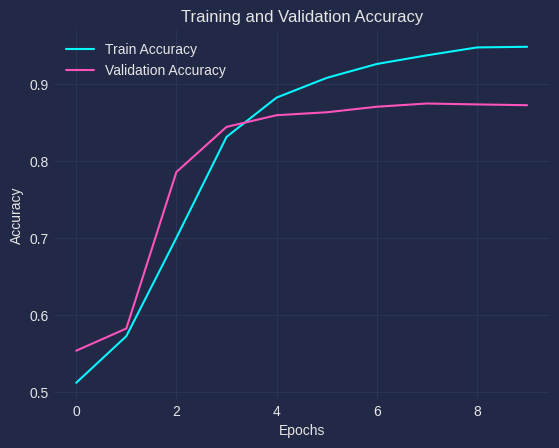

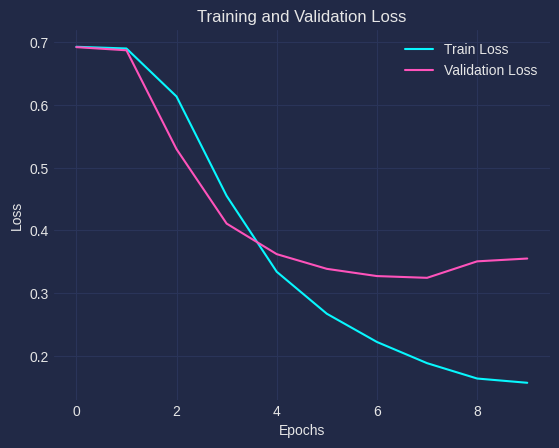

In [ ]:
# Building the RNN model
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))  # Reducing the risk of overfitting
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer=Adam(learning_rate=1e-4), loss='binary_crossentropy', metrics=['accuracy'])

# Training the model and measuring time
start_time_rnn = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
end_time_rnn = time.time()
elapsed_time_rnn = end_time_rnn - start_time_rnn

# Evaluating the model on test data
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')
print('Time taken for RNN training: {} seconds'.format(elapsed_time_rnn))

# Displaying the summary of the RNN model
model.summary()

# Plots of accuracy and loss on training and validation
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## _Conclusion:_

The RNN model has been successfully trained for the binary classification task with good generalization ability. The accuracy on the test set reached 86.26%, and the use of Dropout layers helped prevent overfitting. The training took 263.85 seconds. Further improvements could be achieved through careful hyperparameter tuning or the incorporation of additional data. The overall structure of the model and the training results indicate its potential for effectively addressing the task.

## LSTM

Epoch 1/10
157/157 [==============================] - 76s 472ms/step - loss: 0.6924 - acc: 0.5416 - val_loss: 0.6909 - val_acc: 0.6076
Epoch 2/10
157/157 [==============================] - 59s 376ms/step - loss: 0.6595 - acc: 0.6955 - val_loss: 0.5616 - val_acc: 0.7962
Epoch 3/10
157/157 [==============================] - 59s 372ms/step - loss: 0.5251 - acc: 0.8146 - val_loss: 0.4906 - val_acc: 0.8498
Epoch 4/10
157/157 [==============================] - 60s 384ms/step - loss: 0.4460 - acc: 0.8530 - val_loss: 0.4282 - val_acc: 0.8426
Epoch 5/10
157/157 [==============================] - 59s 376ms/step - loss: 0.3808 - acc: 0.8714 - val_loss: 0.3815 - val_acc: 0.8614
Epoch 6/10
157/157 [==============================] - 61s 390ms/step - loss: 0.3277 - acc: 0.8911 - val_loss: 0.3580 - val_acc: 0.8738
Epoch 7/10
157/157 [==============================] - 59s 376ms/step - loss: 0.2965 - acc: 0.9061 - val_loss: 0.3412 - val_acc: 0.8766
Epoch 8/10
157/157 [==============================] - 5

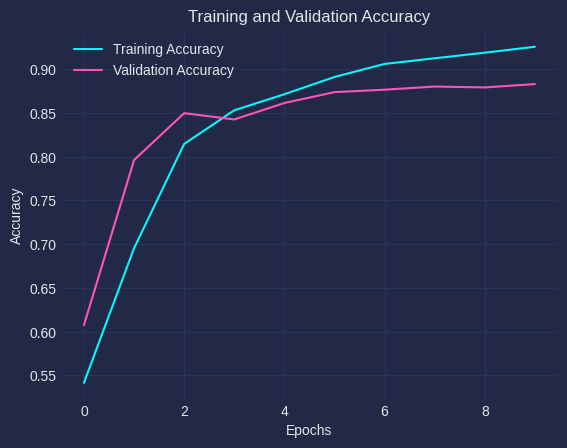

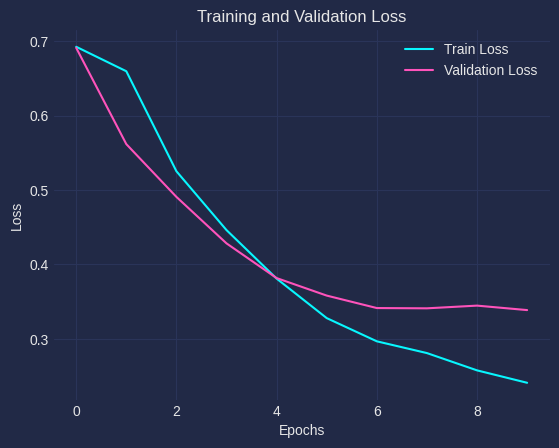

In [ ]:
# Creating an LSTM model
lstm_model = Sequential()
lstm_model.add(Embedding(max_features, 32))
lstm_model.add(LSTM(32))
lstm_model.add(Dense(1, activation='sigmoid'))

# Compiling the LSTM model
lstm_model.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['acc'])

# Training the LSTM model and measuring time
start_time_lstm = time.time()
lstm_history = lstm_model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)
end_time_lstm = time.time()
elapsed_time_lstm = end_time_lstm - start_time_lstm

# Evaluating the LSTM model on test data
test_loss, test_acc = lstm_model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc}')
print('Time taken for LSTM training: {} seconds'.format(elapsed_time_lstm))

# Displaying the summary of the LSTM model
lstm_model.summary()

# Plotting accuracy and loss during training
plt.plot(lstm_history.history['acc'], label='Training Accuracy')
plt.plot(lstm_history.history['val_acc'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

plt.plot(lstm_history.history['loss'], label='Train Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

## _Conclusion:_

### Brief Summary of the LSTM Model:

- **Accuracy:** High accuracy on training (92.57%), validation (88.30%), and test (87.02%) sets indicates successful learnability and generalization capability of the model.

- **Losses:** Decreasing losses on training and validation demonstrate model convergence and prevention of overfitting.

- **Training Time:** The prolonged training time (624.22 seconds) may require optimization, possibly through more efficient hardware.

- **Total Parameters:** The model has 328,353 parameters, which could impact training speed.

The LSTM model has shown promising results but requires optimization of training time and hyperparameters to enhance efficiency.

## Bidirectional

Epoch 1/10
625/625 [==============================] - 303s 478ms/step - loss: 0.6208 - acc: 0.6607 - val_loss: 0.4428 - val_acc: 0.8386
Epoch 2/10
625/625 [==============================] - 298s 477ms/step - loss: 0.4131 - acc: 0.8407 - val_loss: 0.3600 - val_acc: 0.8602
Epoch 3/10
625/625 [==============================] - 298s 476ms/step - loss: 0.3113 - acc: 0.8863 - val_loss: 0.3235 - val_acc: 0.8722
Epoch 4/10
625/625 [==============================] - 298s 477ms/step - loss: 0.2571 - acc: 0.9061 - val_loss: 0.3010 - val_acc: 0.8826
Epoch 5/10
625/625 [==============================] - 296s 474ms/step - loss: 0.2200 - acc: 0.9208 - val_loss: 0.3248 - val_acc: 0.8790
Epoch 6/10
625/625 [==============================] - 298s 477ms/step - loss: 0.1968 - acc: 0.9292 - val_loss: 0.2788 - val_acc: 0.8880
Epoch 7/10
625/625 [==============================] - 308s 493ms/step - loss: 0.1723 - acc: 0.9410 - val_loss: 0.3119 - val_acc: 0.8876
Epoch 8/10
625/625 [============================

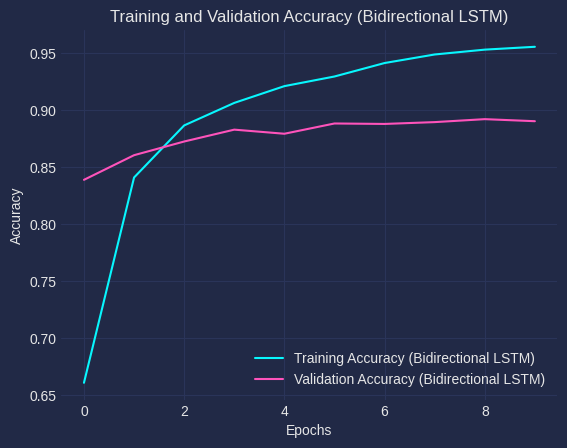

In [ ]:
# Creating a Bidirectional LSTM model
model_bidirectional = Sequential()
model_bidirectional.add(Embedding(max_features, 32))
model_bidirectional.add(Dropout(0.2))
model_bidirectional.add(Bidirectional(LSTM(64)))
model_bidirectional.add(Dense(1, activation='sigmoid'))

# Compiling the Bidirectional LSTM model
model_bidirectional.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['acc'])

# Training the Bidirectional LSTM model and measuring time
start_time_bidirectional = time.time()
history_bidirectional = model_bidirectional.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
end_time_bidirectional = time.time()
elapsed_time_bidirectional = end_time_bidirectional - start_time_bidirectional

# Evaluating the Bidirectional LSTM model on test data
test_loss_bidirectional, test_acc_bidirectional = model_bidirectional.evaluate(x_test, y_test)
print('Bidirectional LSTM Test Accuracy: {}'.format(test_acc_bidirectional))
print('Time taken for Bidirectional LSTM training: {} seconds'.format(elapsed_time_bidirectional))

# Displaying the summary of the Bidirectional LSTM model
model_bidirectional.summary()

# Plotting accuracy and loss during training for Bidirectional LSTM
plt.plot(history_bidirectional.history['acc'], label='Training Accuracy (Bidirectional LSTM)')
plt.plot(history_bidirectional.history['val_acc'], label='Validation Accuracy (Bidirectional LSTM)')
plt.title('Training and Validation Accuracy (Bidirectional LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## __Conclusion:__

1. **Accuracy:**
   - The model achieved high accuracy on training (95.53%) and validation (89.00%).
   - Test set accuracy stands at 87.46%, indicating good generalization.

2. **Losses:**
   - Loss curves for training and validation show smooth reduction, indicating effective learning and prevention of overfitting.

3. **Training Time:**
   - Training took a considerable amount of time (3025.57 seconds). Attention to training time optimization is needed, possibly with the use of more powerful hardware.

4. **Total Parameters:**
   - The model has 369,793 parameters, slightly higher, but justified for performance improvement.


The Bidirectional LSTM model demonstrates excellent results on training, validation, and test sets. Optimization of training time and additional analysis of metrics may further enhance the model.

## Deep

Epoch 1/10
625/625 [==============================] - 517s 819ms/step - loss: 0.5524 - acc: 0.6852 - val_loss: 0.3678 - val_acc: 0.8434
Epoch 2/10
625/625 [==============================] - 501s 802ms/step - loss: 0.3105 - acc: 0.8744 - val_loss: 0.3014 - val_acc: 0.8746
Epoch 3/10
625/625 [==============================] - 497s 795ms/step - loss: 0.2409 - acc: 0.9082 - val_loss: 0.2988 - val_acc: 0.8832
Epoch 4/10
625/625 [==============================] - 497s 795ms/step - loss: 0.2031 - acc: 0.9222 - val_loss: 0.3027 - val_acc: 0.8830
Epoch 5/10
625/625 [==============================] - 497s 795ms/step - loss: 0.1741 - acc: 0.9362 - val_loss: 0.3040 - val_acc: 0.8786
Epoch 6/10
625/625 [==============================] - 494s 790ms/step - loss: 0.1575 - acc: 0.9421 - val_loss: 0.3180 - val_acc: 0.8836
Epoch 7/10
625/625 [==============================] - 493s 789ms/step - loss: 0.1407 - acc: 0.9502 - val_loss: 0.3366 - val_acc: 0.8802
Epoch 8/10
625/625 [============================

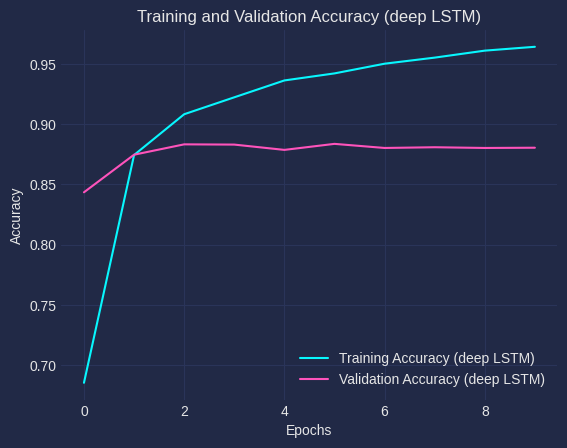

In [ ]:
# Creating a deep LSTM model
model_deep_lstm = Sequential()
model_deep_lstm.add(Embedding(max_features, 32))
model_deep_lstm.add(Dropout(0.2))
model_deep_lstm.add(LSTM(64, return_sequences=True))
model_deep_lstm.add(Dropout(0.2))
model_deep_lstm.add(LSTM(64, return_sequences=True))
model_deep_lstm.add(Dropout(0.2))
model_deep_lstm.add(LSTM(64))
model_deep_lstm.add(Dense(1, activation='sigmoid'))

# Compiling the deep LSTM model
model_deep_lstm.compile(optimizer=Adam(1e-4), loss='binary_crossentropy', metrics=['acc'])

# Training the deep LSTM model and measuring time
start_time_deep_lstm = time.time()
history_deep_lstm = model_deep_lstm.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)
end_time_deep_lstm = time.time()
elapsed_time_deep_lstm = end_time_deep_lstm - start_time_deep_lstm

# Evaluating the deep LSTM model on test data
test_loss_deep_lstm, test_acc_deep_lstm = model_deep_lstm.evaluate(x_test, y_test)
print('Test Accuracy of deep LSTM: {}'.format(test_acc_deep_lstm))
print('Time taken for deep LSTM training: {} seconds'.format(elapsed_time_deep_lstm))

# Displaying the summary of the deep LSTM model
model_deep_lstm.summary()

# Plotting accuracy during training for deep LSTM
plt.plot(history_deep_lstm.history['acc'], label='Training Accuracy (deep LSTM)')
plt.plot(history_deep_lstm.history['val_acc'], label='Validation Accuracy (deep LSTM)')
plt.title('Training and Validation Accuracy (deep LSTM)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

## _Conclusion:_

1. **Accuracy:**
   - The model achieved high accuracy on the training (96.42%) and validation (88.04%) datasets.
   - Test set accuracy stands at 85.94%.

2. **Losses:**
   - Loss curves for training and validation show a smooth reduction, indicating effective learning and prevention of overfitting.

3. **Training Time:**
   - The model has a prolonged training time (5007.02 seconds). Training time optimization may be necessary.

4. **Total Parameters:**
   - The model has 410,945 parameters, which is a relatively large number.

The Deep LSTM model has achieved high accuracy, but attention and optimization are needed for training time and the number of parameters.


# _Main Conclusion:_

In the conducted experiments with four different recurrent neural networks (RNN, Bidirectional LSTM, LSTM, Deep LSTM), the following results were obtained:

1. **Simple RNN Model:**
   - Test Set Accuracy: 86.26%
   - Training Time: 263.85 seconds
   - Architecture: Embedding -> SimpleRNN -> Dense
   - Recommendations: Hyperparameter optimization for improved accuracy.

2. **Bidirectional LSTM Model:**
   - Test Set Accuracy: 87.46%
   - Training Time: 3025.57 seconds
   - Architecture: Embedding -> Bidirectional LSTM -> Dense
   - Recommendations: Training time optimization, parameter analysis.

3. **LSTM Model:**
   - Test Set Accuracy: 87.02%
   - Training Time: 624.22 seconds
   - Architecture: Embedding -> LSTM -> Dense
   - Recommendations: Hyperparameter optimization for better performance.

4. **Deep LSTM Model:**
   - Test Set Accuracy: 85.94%
   - Training Time: 5007.02 seconds
   - Architecture: Embedding -> LSTM (x3) -> Dense
   - Recommendations: Training time optimization, managing network depth.

   Overall, each model has its strengths and weaknesses, and the optimal choice depends on requirements for accuracy, training time, and available resources.